In [1]:
import pandas as pd

df = pd.read_csv("Results_21Mar2022_new.csv")

# Step 1 Explore and understand dataset

In [2]:
age_unique_values = df['age_group'].unique()
age_unique_values

array(['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'], dtype=object)

In [3]:
diet_unique_values = df['diet_group'].unique()
diet_unique_values

array(['fish', 'meat50', 'meat100', 'meat', 'vegan', 'veggie'],
      dtype=object)

In [4]:
# Filter rows where 'mc_run_id' is equal to 1
filtered_df = df[df['mc_run_id'] == 1]

# Sum the 'n_participate' values in the filtered DataFrame
total_participation = filtered_df['n_participants'].sum()
total_participation

55504

- The dataset have 72000 rows in total
- The participaters are 55504 in total
- Each kind of group members attended 1000 cycles tests, there are three attributes in each group:
    - Age
    - Sex
    - Diet type

# Step 2 Data Proprecessing

1. missing data
2. scales

In [5]:
print(df[df.isna().any(axis=1)].shape)

(0, 23)


There is no missing data in this dataset

## 2.1 Feature selection
1. check environment features first

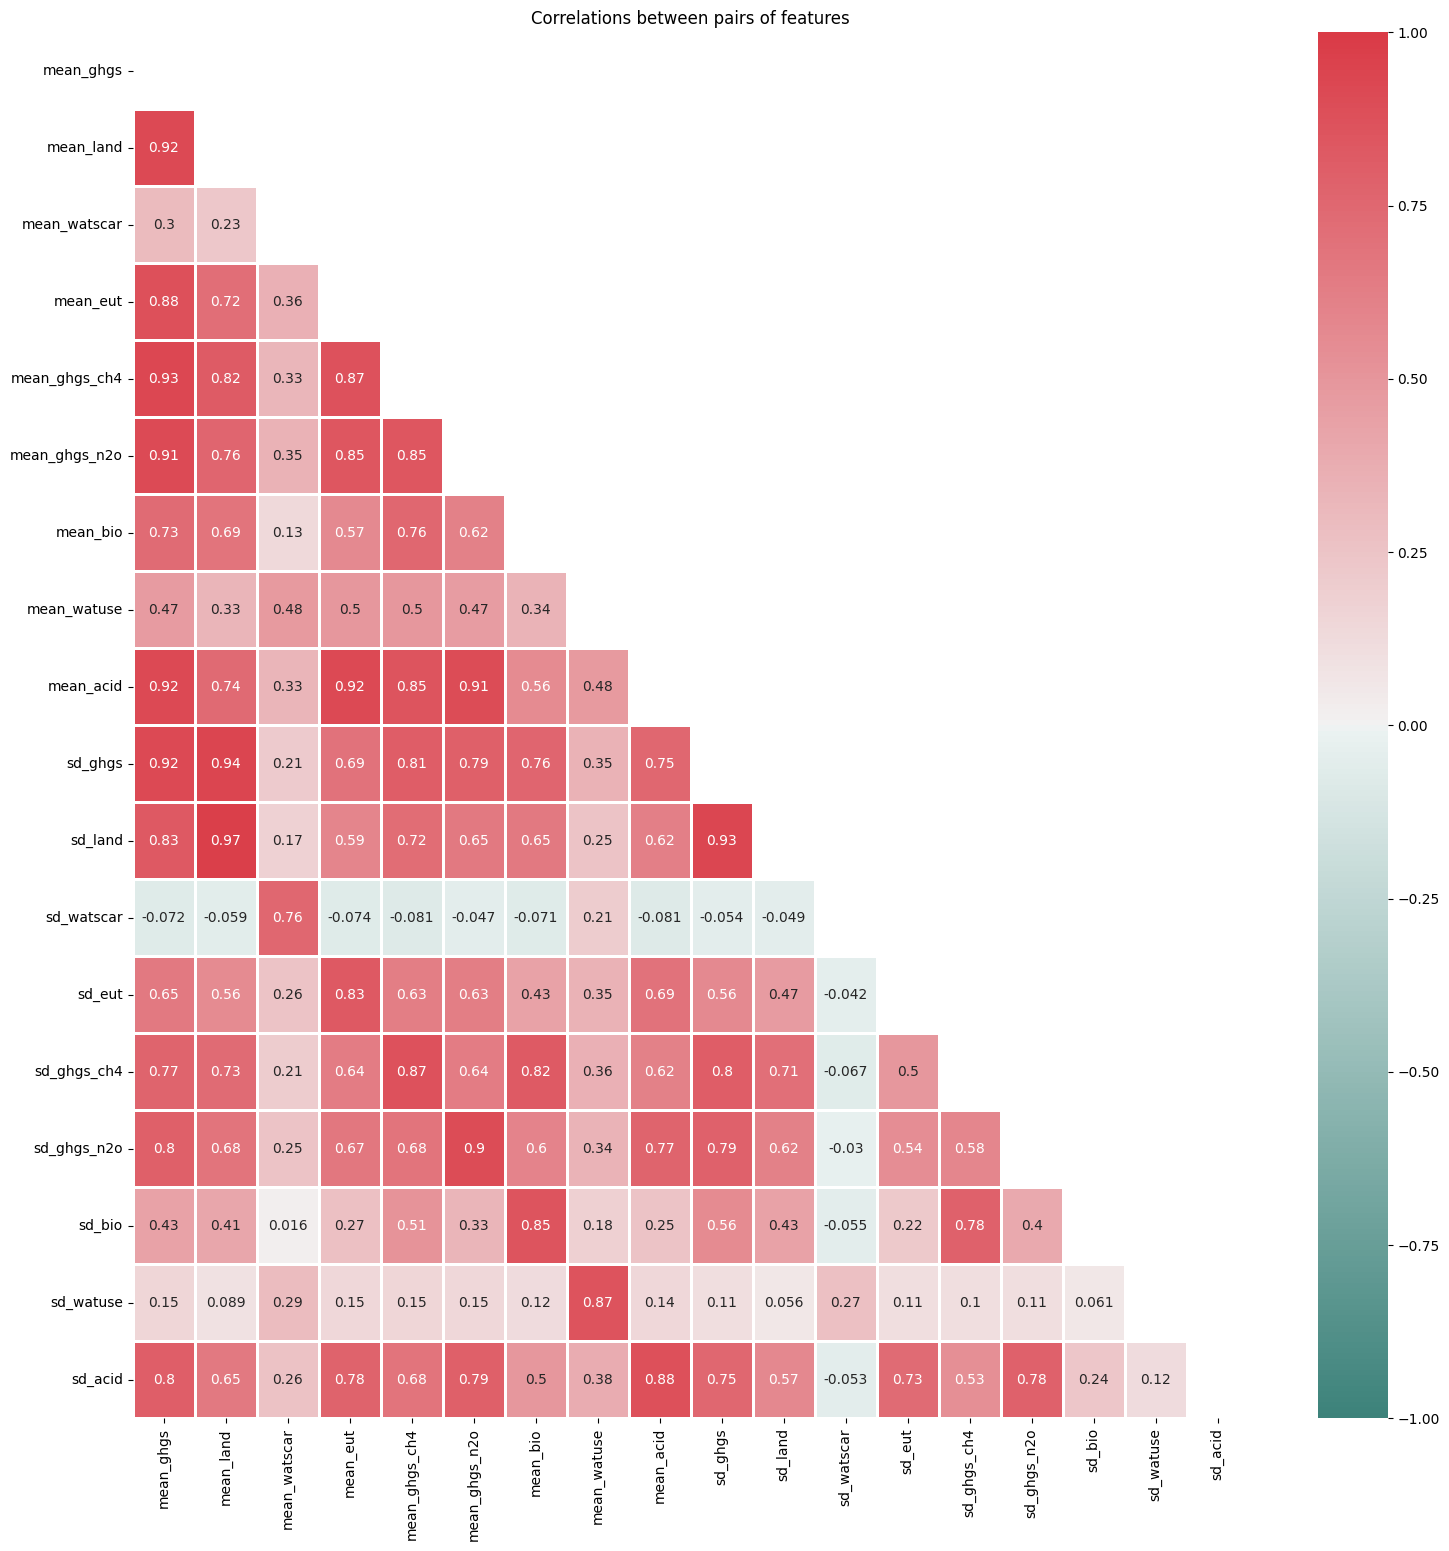

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

env_features = df.drop(['mc_run_id', 'n_participants', 'sex', 'diet_group', 'age_group'], axis=1)
# Compute the correlation matrix to observe the correlations between pairs of features. 
corrMatt = env_features.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18, 18))
plt.title('Correlations between pairs of features')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(180, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corrMatt, 
    vmax=1, 
    vmin=-1,
    square=False, 
    cmap=cmap, 
    mask=mask,
    ax=ax, 
    annot=True, 
    fmt='.2g', 
    linewidths=1);
plt.savefig("corr.png")

Since mean and sd can present different attributes of features, so I decide to visualize both of them
- Mean: Use the mean to visualize the central tendency of your data. This is helpful for understanding:
    - The average value of the feature.
    - How the data is distributed around the center.
- Standard Deviation: Use the standard deviation to visualize the spread of your data around the mean. This is helpful for understanding:
    - The variability of the feature's values.
    - How many data points fall within a certain range of the mean.

## 2.2 Normalisation
All the features have different scales, use MinMaxScaler to normalize them

In [7]:

feature_scale = df.drop(['mc_run_id','n_participants', 'sex', 'diet_group', 'age_group'], axis=1)

In [8]:
df

,mc_run_id,diet_group,sex,age_group,n_participants,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,...,mean_acid,sd_ghgs,sd_land,sd_watscar,sd_eut,sd_ghgs_ch4,sd_ghgs_n2o,sd_bio,sd_watuse,sd_acid
0,1,fish,female,20-29,1329,5.421821,8.612772,14165.86240,23.945372,1.164643,...,23.439196,2.043121,3.811792,5411.942852,8.167013,0.632547,0.146827,283.883428,249.472563,8.231176
1,1,fish,female,30-39,2024,5.436673,8.680248,15222.77063,24.305262,1.154118,...,24.166260,1.925977,3.527834,5761.698432,8.467858,0.601941,0.130298,270.247108,277.927269,7.947014
2,1,fish,female,40-49,1689,5.289333,8.467723,15818.80068,24.191105,1.108404,...,24.597700,1.781471,3.093305,5929.502250,8.107006,0.572941,0.119872,252.415063,275.760515,8.103589
3,1,fish,female,50-59,946,5.169020,8.219199,16962.06009,24.748154,1.032501,...,25.004637,1.749271,3.103613,7230.767144,9.514028,0.509689,0.104731,209.566722,310.422445,8.712428
4,1,fish,female,60-69,492,5.380268,8.570718,18212.66232,25.559430,1.098828,...,26.048737,1.961814,3.664188,7264.966514,9.258068,0.609398,0.113401,264.599257,315.922570,8.616601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71995,1000,veggie,male,30-39,1221,6.615301,11.385959,13374.38105,18.283800,1.769398,...,21.075983,3.739361,6.886761,4890.231408,6.829520,1.524615,0.269856,610.318478,268.939576,8.510504
71996,1000,veggie,male,40-49,961,6.185949,10.566347,12959.68443,17.342092,1.605406,...,20.225756,3.526844,6.428490,5517.368057,6.369390,1.430116,0.252651,570.034533,262.366892,7.988943
71997,1000,veggie,male,50-59,426,5.871454,9.806539,11924.19092,16.625511,1.468003,...,19.625305,3.412583,6.076468,4656.968038,6.266982,1.381163,0.274705,559.427383,241.645519,7.780208
71998,1000,veggie,male,60-69,229,5.922496,9.873027,11310.87733,16.531075,1.492114,...,19.936478,3.495788,6.410657,4879.844193,6.240777,1.435583,0.276000,582.000324,244.768887,7.779582


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(feature_scale)
scaled_feature = pd.DataFrame(df_scaled, columns=feature_scale.columns)
scaled_feature

,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,sd_ghgs,sd_land,sd_watscar,sd_eut,sd_ghgs_ch4,sd_ghgs_n2o,sd_bio,sd_watuse,sd_acid
0,0.189852,0.077412,0.164895,0.213057,0.206959,0.159248,0.307195,0.155132,0.232166,0.141788,0.049983,0.054403,0.137262,0.188305,0.174145,0.315561,0.066041,0.215406
1,0.190648,0.078357,0.185196,0.217693,0.204977,0.147124,0.301112,0.164500,0.242734,0.130954,0.044912,0.059918,0.143994,0.178619,0.147561,0.299144,0.076077,0.204794
2,0.182755,0.075381,0.196644,0.216222,0.196371,0.135182,0.279785,0.164049,0.249005,0.117590,0.037150,0.062565,0.135919,0.169442,0.130791,0.277675,0.075313,0.210642
3,0.176309,0.071900,0.218604,0.223397,0.182081,0.126380,0.248541,0.168156,0.254920,0.114612,0.037335,0.083084,0.167404,0.149424,0.106439,0.226089,0.087538,0.233379
4,0.187626,0.076823,0.242626,0.233846,0.194568,0.135479,0.267044,0.177253,0.270095,0.134269,0.047347,0.083623,0.161676,0.180979,0.120384,0.292344,0.089478,0.229800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71995,0.253791,0.116250,0.149692,0.140136,0.320815,0.259329,0.427915,0.117241,0.197817,0.298664,0.104905,0.046176,0.107334,0.470618,0.372025,0.708566,0.072907,0.225838
71996,0.230790,0.104771,0.141726,0.128007,0.289941,0.233170,0.383456,0.106712,0.185459,0.279010,0.096720,0.056066,0.097037,0.440712,0.344352,0.660067,0.070589,0.206360
71997,0.213941,0.094130,0.121836,0.118778,0.264072,0.222987,0.349110,0.093758,0.176732,0.268443,0.090433,0.042498,0.094746,0.425220,0.379824,0.647296,0.063281,0.198565
71998,0.216675,0.095062,0.110056,0.117561,0.268612,0.227255,0.357614,0.093711,0.181255,0.276138,0.096402,0.046013,0.094160,0.442442,0.381908,0.674473,0.064383,0.198542


In [10]:
unscale_feature_name = ['n_participants', 'age_group', 'sex', 'diet_group', 'mc_run_id']
for name in unscale_feature_name:
    # scaled_feature[name] = df[name]
    i = 0
    scaled_feature.insert(i, name, df[name])
    i =+1
# scaled_feature.to_csv('Results21Mar2022_new_scaled_dataset.csv', index=False)

In [11]:
scaled_feature

,mc_run_id,diet_group,sex,age_group,n_participants,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,...,mean_acid,sd_ghgs,sd_land,sd_watscar,sd_eut,sd_ghgs_ch4,sd_ghgs_n2o,sd_bio,sd_watuse,sd_acid
0,1,fish,female,20-29,1329,0.189852,0.077412,0.164895,0.213057,0.206959,...,0.232166,0.141788,0.049983,0.054403,0.137262,0.188305,0.174145,0.315561,0.066041,0.215406
1,1,fish,female,30-39,2024,0.190648,0.078357,0.185196,0.217693,0.204977,...,0.242734,0.130954,0.044912,0.059918,0.143994,0.178619,0.147561,0.299144,0.076077,0.204794
2,1,fish,female,40-49,1689,0.182755,0.075381,0.196644,0.216222,0.196371,...,0.249005,0.117590,0.037150,0.062565,0.135919,0.169442,0.130791,0.277675,0.075313,0.210642
3,1,fish,female,50-59,946,0.176309,0.071900,0.218604,0.223397,0.182081,...,0.254920,0.114612,0.037335,0.083084,0.167404,0.149424,0.106439,0.226089,0.087538,0.233379
4,1,fish,female,60-69,492,0.187626,0.076823,0.242626,0.233846,0.194568,...,0.270095,0.134269,0.047347,0.083623,0.161676,0.180979,0.120384,0.292344,0.089478,0.229800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71995,1000,veggie,male,30-39,1221,0.253791,0.116250,0.149692,0.140136,0.320815,...,0.197817,0.298664,0.104905,0.046176,0.107334,0.470618,0.372025,0.708566,0.072907,0.225838
71996,1000,veggie,male,40-49,961,0.230790,0.104771,0.141726,0.128007,0.289941,...,0.185459,0.279010,0.096720,0.056066,0.097037,0.440712,0.344352,0.660067,0.070589,0.206360
71997,1000,veggie,male,50-59,426,0.213941,0.094130,0.121836,0.118778,0.264072,...,0.176732,0.268443,0.090433,0.042498,0.094746,0.425220,0.379824,0.647296,0.063281,0.198565
71998,1000,veggie,male,60-69,229,0.216675,0.095062,0.110056,0.117561,0.268612,...,0.181255,0.276138,0.096402,0.046013,0.094160,0.442442,0.381908,0.674473,0.064383,0.198542


# Step 3 Calculate means of each feature in different diet_group (just for reference)

In [ ]:
df.head()
df_new = df.drop(['grouping', 'n_participants'], axis=1)
df_new

In [ ]:
df_drop = df.drop(['grouping', 'n_participants', 'sex', 'age_group'], axis=1)
diet_data = df_drop.groupby(['mc_run_id', 'diet_group']).mean().reset_index()
diet_data.head(15)
diet_data.to_csv('diet_dataset.csv', index=False)

In [ ]:
def get_features_name(dataset, exlude_top_number):
    all_features = list(dataset.columns)
    top_features_to_exclude = all_features[:exlude_top_number]
    remaining_features = [feature for feature in all_features if feature not in top_features_to_exclude]

    return remaining_features

def normalize_minmaxscaler(dataset, features_to_normalize):
    scaler = MinMaxScaler()
    df_scaled = diet_data[features_to_normalize].copy() 
    df_scaled = scaler.fit_transform(df_scaled)
    dataset[features_to_normalize] = df_scaled 
    
    return dataset

features_names = get_features_name(diet_data, 2)
diet_data_scaled = normalize_minmaxscaler(diet_data, features_names)

diet_data_scaled